In [15]:
# Implement non maximum suppression function using numpy arrays
import numpy as np


def non_max_suppression(boxes, scores, iou_threshold):
    
    # Step 1: Sort score indexes by scores in descending order
    order = scores.argsort()[::-1]
    
    # Inititate a list to keep indexes
    keep = []

    # Get coordinates of bounding boxes
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]
    
    # Compute iou
    while order.size > 0:
        # Get the first box to be the ground truth
        i = order[0]
        keep.append(i)

        xx1 = np.maximum(x1[i], x1[order[1:]])
        yy1 = np.maximum(y1[i], y1[order[1:]])
        xx2 = np.maximum(x2[i], x2[order[1:]])
        yy2 = np.maximum(y2[i], y2[order[1:]])

        # Compute areas of bounding boxes (excluded the first bbox)
        w = np.maximum(0, xx2 - xx1)
        h = np.maximum(0, yy2 - yy1)

        intersection = w*h
        
        
        print(intersection)

        break


# Tests
boxes = np.array([
    [12, 84, 140, 212],
    [24, 84, 152, 212],
    [36, 84, 164, 212],
    [12, 96, 140, 224],
    [24, 96, 152, 224]
])

scores = np.array([0.3, 0.4, 0.5, 0.6, 0.7])
iou_threshold = 0.3

print(non_max_suppression(boxes, scores, iou_threshold))

[0 0 0 0]
None


2
(240, 2)
[ 9.47222222  9.35555556  9.37777778  8.28888889  8.75555556  9.22222222
  7.73333333  8.77222222 10.82222222 13.77222222]


Text(0.5, 0, 'Index')

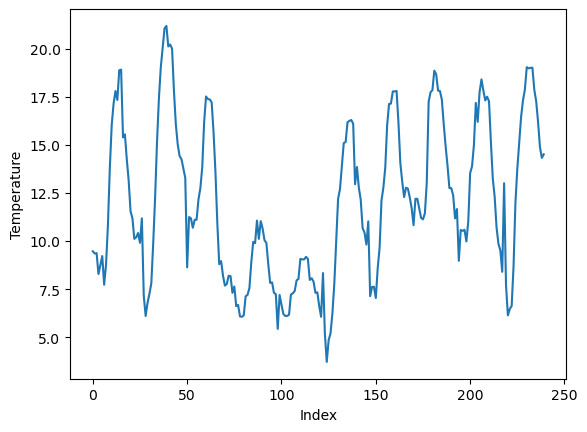

In [23]:
# Read csv and plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('temperature-1d.csv').to_numpy()
print(data.ndim)
print(data.shape)

temps = data[:, 1]
print(temps[:10])
plt.plot(temps)
plt.ylabel('Temperature')
plt.xlabel('Index')

In [26]:
# Reshape temps into day
temp_daily = np.reshape(temps, (-1, 24))

display(temp_daily[:2])

array([[ 9.47222222,  9.35555556,  9.37777778,  8.28888889,  8.75555556,
         9.22222222,  7.73333333,  8.77222222, 10.82222222, 13.77222222,
        16.01666667, 17.14444444, 17.8       , 17.33333333, 18.87777778,
        18.91111111, 15.38888889, 15.55      , 14.25555556, 13.14444444,
        11.55      , 11.18333333, 10.11666667, 10.2       ],
       [10.42222222,  9.91111111, 11.18333333,  7.15555556,  6.11111111,
         6.78888889,  7.26111111,  7.8       ,  9.87222222, 12.22222222,
        15.09444444, 17.35555556, 19.00555556, 20.04444444, 21.05      ,
        21.18333333, 20.11666667, 20.21666667, 20.        , 17.8       ,
        16.06111111, 15.02222222, 14.42222222, 14.25555556]])

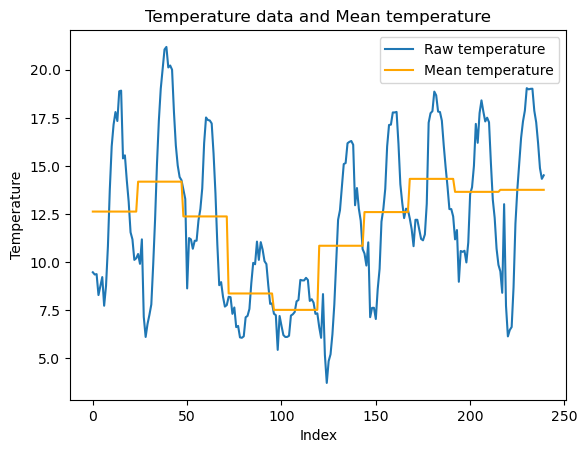

In [42]:
# Plot daily mean temperature on the same plot
import matplotlib.pyplot as plt

# Compute mean temperature for daily
daily_means = temp_daily.mean(axis=1)
# print(daily_means)
daily_means_repeat = np.repeat(daily_means, 24)
# print(daily_means_repeat)

plt.plot(temps, label='Raw temperature')
plt.plot(daily_means_repeat, color='orange', label='Mean temperature')
# plt.grid(True)
plt.legend(loc='upper right')
plt.ylabel('Temperature')
plt.xlabel('Index')
plt.title('Temperature data and Mean temperature')
plt.show()

In [51]:
# TODO: One-hot encoding
import numpy as np

labels = np.arange(3).repeat(3)
k_class = len(set(labels))
n_sample = len(labels)

print(labels)
print('k_classes', k_class)
print('n_sample', n_sample)

# Create nxk matrix
one_hot = np.zeros((n_sample, k_class))

# Turn on the feature for each row, col value => set it to 1
one_hot[np.arange(n_sample), labels] = 1
print(one_hot)

print(one_hot)

[0 0 0 1 1 1 2 2 2]
k_classes 3
n_sample 9
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [63]:
# Iris problem
import numpy as np
import numpy.core.defchararray as np_f

path = 'iris.csv'
# Read in features from csv file
features = np.genfromtxt(fname=path, dtype=float,
                         delimiter=',',
                         skip_header=1,
                         usecols=[0, 1, 2, 3])

display(features[:10])

# Read in labels from csv file
labels = np.genfromtxt(fname=path, dtype=str,
                       delimiter=',',
                       skip_header=1,
                       usecols=[4])
display(labels[:10])

# Get unique labels
unique_labels = np.unique(labels)
print(unique_labels)

# Replace labels in strings with digits

for i in range(unique_labels.size):
    labels = np_f.replace(labels, unique_labels[i], str(i))

# Convert labels dtype to float
labels = labels.astype(float)
print(labels)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa'], dtype='<U10')

['Setosa' 'Versicolor' 'Virginica']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


In [60]:
unique_labels = np.char.replace(unique_labels, unique_labels, ['0', '1', '2'])

unique_labels = unique_labels.astype(float)
print(unique_labels)

[0. 1. 2.]
